## 공용 코드

In [1]:
# 파이썬
# ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 깔끔한 그래프 출력을 위해 %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# 이미지를 저장할 디렉토리 생성
os.makedirs(IMAGES_PATH, exist_ok=True)

# 이미지 저장
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

from matplotlib import font_manager, rc
import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    
    
mpl.rcParams['axes.unicode_minus'] = False
# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3

# 그래픽 출력을 좀 더 고급화하기 위한 라이브러리
import seaborn as sns

# 과학 기술 통계 라이브러리
import scipy as sp
from scipy import stats

# 사이킷런 ≥0.20 필수
# 0.20 이상 버전에서 데이터 변환을 위한 Transformer 클래스가 추가됨
import sklearn
assert sklearn.__version__ >= "0.20"

# 노트북 실행 결과를 동일하게 유지하기 위해 시드 고정
# 데이터를 분할할 때 동일한 분할을 만들어 냄
np.random.seed(21)

## 장르별 줄거리 데이터만 가져오기

### 데이터 가져오기

In [4]:
origin_data = pd.read_excel('./3차_VOD_2308.xlsx')

In [ ]:
origin_data.head()

### 장르별 줄거리 중복 없이 저장

In [ ]:
# 필요한 컬럼만 추출
sub_data = origin_data[['ct_cl','genre_of_ct_cl', 'SMRY']]
sub_data.head()

# 결측 데이터 처리
sub_data['SMRY'].fillna('miss')


In [27]:
# 데이터 타입 확인
print(type(sub_data['genre_of_ct_cl'][0]))
print(type(sub_data['SMRY'][0]))

<class 'str'>
<class 'str'>


In [ ]:
data_list = {}

for data in sub_data.iterrows():
    # 데이터 구분
    ct_cl = data[1]['ct_cl']
    genre = data[1]['genre_of_ct_cl']
    summary = data[1]['SMRY']
    
    # / 가 포함되어 있으면 파일 경로에 문제가 생기므로 & 로 대체
    if '/' in ct_cl:
        ct_cl = ct_cl.replace('/', '&')
    if '/' in genre:
        genre = genre.replace('/', '&')
    
    detail_genre = ct_cl + '-' + genre
    
    
    # 기존에 있던 장르라면 줄거리 비교하고 추가
    if detail_genre in data_list:
        if summary not in data_list[detail_genre]:
            data_list[detail_genre].append(summary)
    
    # 기존에 없던 장르라면 새로 생성
    else:
        data_list.update({detail_genre:[summary]})
        print(detail_genre)

# 확인
#print(data_list)

In [ ]:
for item in data_list:
    print(item)

In [ ]:
for item in data_list['키즈-학습']:
    print(item, type(item))
    

### 장르별 줄거리 파일에 기록하기

In [54]:
for detail_genre in data_list:
    # 세부 장르 별로 다른 텍스트 파일을 열기
    output_file = open('./text files/' + detail_genre + '.txt', 'w', encoding = 'utf8')
    
    # 각 세부 장르 별 줄거리를 적어서 저장
    for summary in data_list[detail_genre]:
        if type(summary) == 'str':
            output_file.write(summary)
        else:
            output_file.write(str(summary))
    # 파일 close
    output_file.close()
    

### 파일에서 데이터를 읽어와서 텍스트 추출

In [63]:
from konlpy.tag import Twitter
import nltk

In [61]:
# 'TV 시사&교양-기타' 장르를 가지고 테스트

# 파일에서 데이터 읽어오기
open_file = open('./text files/TV 시사&교양-기타.txt', 'r', encoding = 'utf8')
text = open_file.read()

# 확인
#print(text)

# 형태소 분석
spliter = Twitter()
nouns = spliter.nouns(text)
#print(nouns) # 형태소 확인

open_file.close()

### 추출한 텍스트 확인 및 처리

전체 단어 개수 : 3439
중복을 제외한 단어 개수 : 1611
<FreqDist with 1611 samples and 3439 outcomes>


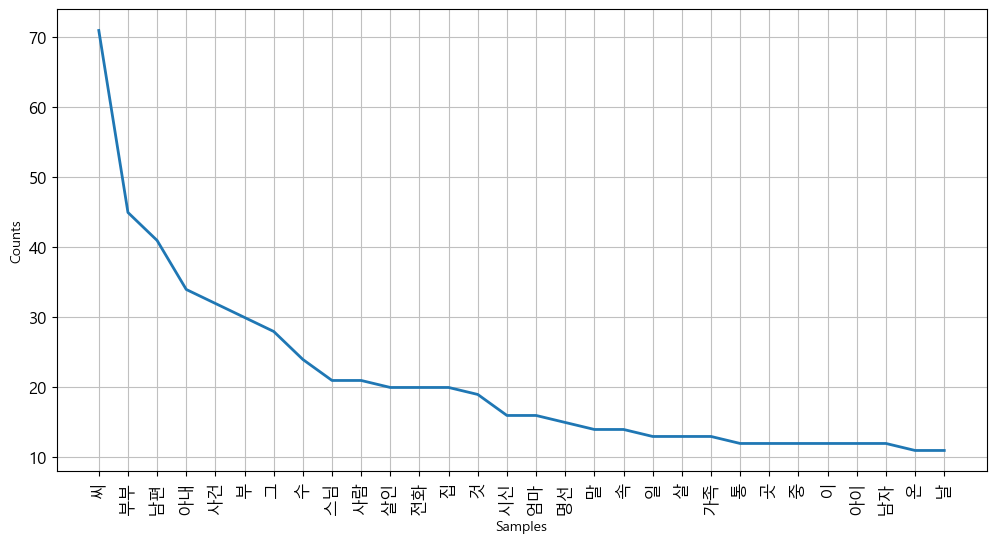

In [66]:
# 단어의 갯수와 등장 횟수 확인

ko = nltk.Text(nouns, name = 'TV 시사&교양-기타')
print('전체 단어 개수 :', len(ko.tokens))
print('중복을 제외한 단어 개수 :', len(set(ko.tokens)))
print(ko.vocab())


# 단어를 가지고 그래프 그리기
plt.figure(figsize = (12, 6))
# 상위 30개 단어로 그리기
ko.plot(30)
plt.show()

In [71]:
# 불용어 제거하기

# 불용어 제거
stop_words = ['등', '남자', '원', '것','여자', '를', '또', '고', '명선']
ko1 = [each_word for each_word in ko if each_word not in stop_words]
ko2 = [each_word for each_word in ko1 if len(each_word) > 1]
#print(ko2)

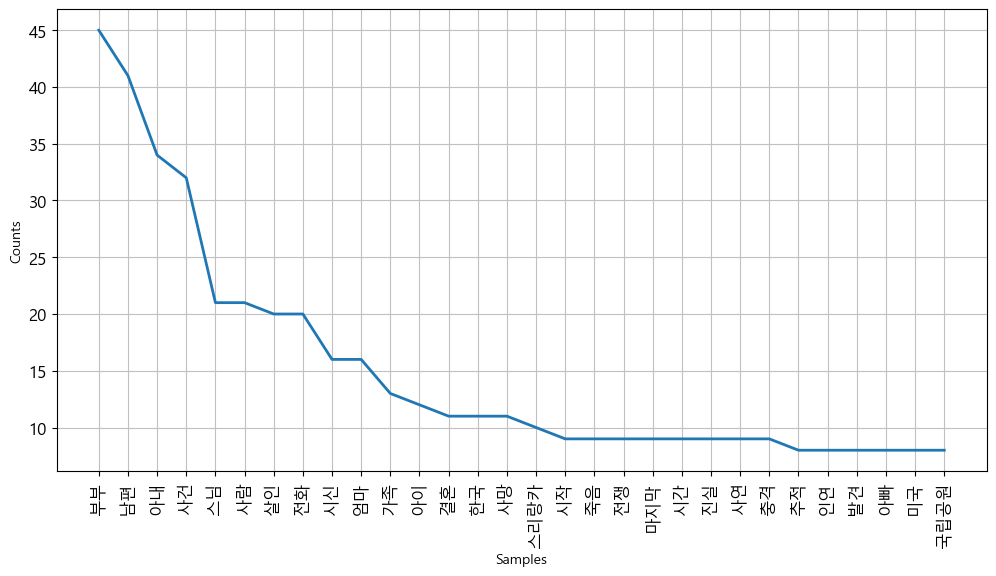

In [72]:
# 불용어를 제거한 결과를 가지고 다시 그래프를 그려서 확인

ko = nltk.Text(ko2, name = 'TV 시사&교양-기타')

plt.figure(figsize = (12, 6))
# 상위 30개 단어로 그리기
ko.plot(30)
plt.show()

### 추출한 텍스트 확인하기

In [73]:
print(type(ko))

<class 'nltk.text.Text'>


In [89]:
#help(ko)

In [88]:
print('불용어 제거 후 전체 단어 개수 : 3439 ->', len(ko.tokens))
print('불용어 제거 후 중복을 제외한 단어 개수 : 1611 ->', len(set(ko.tokens)))

불용어 제거 후 전체 단어 개수 : 3439 -> 2656
불용어 제거 후 중복을 제외한 단어 개수 : 1611 -> 1409


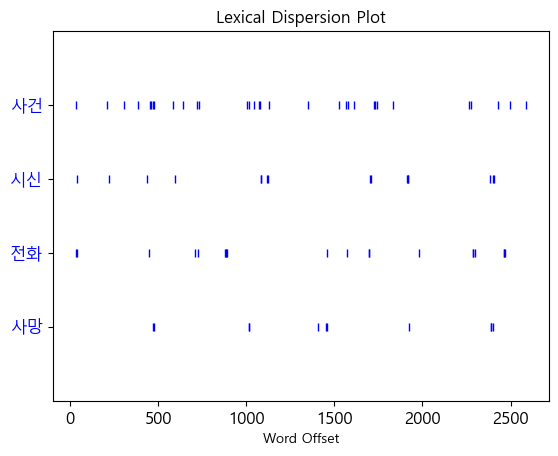

In [91]:
# 단어의 분포 확인
ko.dispersion_plot(['사건', '시신', '전화', '사망'])

In [ ]:
# 사건 이라는 단어가 들어간 문장 탐색

ko.concordance('사건', lines=5) # 전체 32개 문장 중 5개

In [93]:
# '사건'이라는 단어와 유사한 단어 탐색
ko.similar('사건')

In [95]:
# Frequency Distribution 확인하기
print(ko.vocab())
print(type(ko.vocab()))

<FreqDist with 1409 samples and 2656 outcomes>
<class 'nltk.probability.FreqDist'>


In [ ]:
word_dict = dict(ko.vocab())

del_list = []

# 출연 횟수가 5번 미만인 단어 데이터 추출
for item in word_dict:
    if word_dict[item] < 5:
        del_list.append(item)

# 데이터 삭제
for item in del_list:
    del(word_dict[item])

# 확인
print(word_dict)

In [ ]:
word_dict = dict(ko.vocab())

del_list = []

# 출연 횟수가 20번 미만인 단어 데이터 추출
for item in word_dict:
    if word_dict[item] < 20:
        del_list.append(item)

# 데이터 삭제
for item in del_list:
    del(word_dict[item])

# 확인
print(word_dict)